In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import plotly.graph_objects as go
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting as plotting
import warnings
import pandoc as pandoc

warnings.filterwarnings("ignore")

# 1. Data Import

In [55]:
df = pd.read_excel(r"C:\Users\lollo\OneDrive\Desktop\cw2023AP.xlsx")
df.index = df['Date']
df=df.drop(['Date'],axis = 1)
df.columns

Index(['BP', 'HSBC HOLDINGS', 'TESCO', 'VODAFONE GROUP', 'BUNZL',
       'ROLLS-ROYCE HOLDINGS', 'EASYJET', 'LEGAL & GENERAL',
       'FULLER SMITH & TURNR.', 'STANDARD CHARTERED', 'WPP', 'BAE SYSTEMS',
       'ITV', 'AVIVA', 'CENTRICA', 'SEVERN TRENT', 'FTSE 100 - PRICE INDEX',
       'UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE'],
      dtype='object')

In [56]:
df18 = df['2000-12-29':'2018-09-28']   #split the dataset
df23 = df['2018-09-28':'2023-09-29']

In [57]:
rf18 = df18['UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE'].mean()/100    #computing Risk Free Rate for th splitted dfs
rf23 = df23['UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE'].mean()/100

In [58]:
df18_stocks = df18[['BUNZL','ROLLS-ROYCE HOLDINGS','FULLER SMITH & TURNR.', 'BAE SYSTEMS','SEVERN TRENT']]
df23_stocks = df23[['BUNZL','ROLLS-ROYCE HOLDINGS','FULLER SMITH & TURNR.', 'BAE SYSTEMS','SEVERN TRENT']]

## 1.2 Cumulative Returns Plot

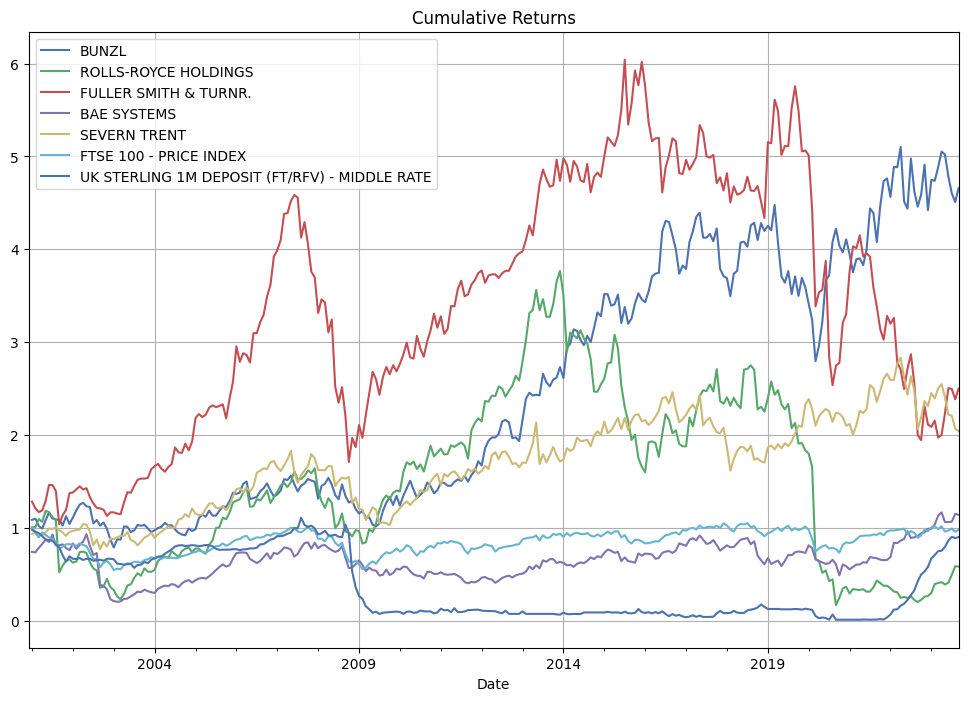

In [59]:
cumulative_ret2018 = (np.log(df[['BUNZL','ROLLS-ROYCE HOLDINGS','FULLER SMITH & TURNR.', 'BAE SYSTEMS','SEVERN TRENT','FTSE 100 - PRICE INDEX']]/df[['BUNZL','ROLLS-ROYCE HOLDINGS','FULLER SMITH & TURNR.', 'BAE SYSTEMS','SEVERN TRENT','FTSE 100 - PRICE INDEX']].shift(1)) + 1).cumprod()
cumulative_interest_rate = ((df['UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE']-df['UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE'].shift(1))/df['UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE'].shift(1)+1).cumprod()
cumulative_ret2018['UK STERLING 1M DEPOSIT (FT/RFV) - MIDDLE RATE'] = cumulative_interest_rate
cumulative_ret2018.plot(figsize=(12, 8),legend=True, title = "Cumulative Returns")
plt.grid(True) 

## 1.3 Descriptive Statistics

In [60]:
df18_stocks.describe()

,BUNZL,ROLLS-ROYCE HOLDINGS,FULLER SMITH & TURNR.,BAE SYSTEMS,SEVERN TRENT
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1029.412617,166.127664,550.246589,382.184579,1430.189626
std,643.135375,103.785212,272.434615,125.851741,518.113911
min,349.720000,16.520000,121.800000,110.000000,625.860000
25%,524.575000,67.875000,309.885000,310.175000,972.625000
50%,710.250000,137.750000,534.685000,370.125000,1417.000000
75%,1594.750000,256.330000,831.690000,460.000000,1848.000000
max,2432.000000,392.170000,1074.740000,665.500000,2505.000000


## 1.4 Correlation analysis

In [61]:
returndf18 = np.log(df18_stocks/df18_stocks.shift(1))

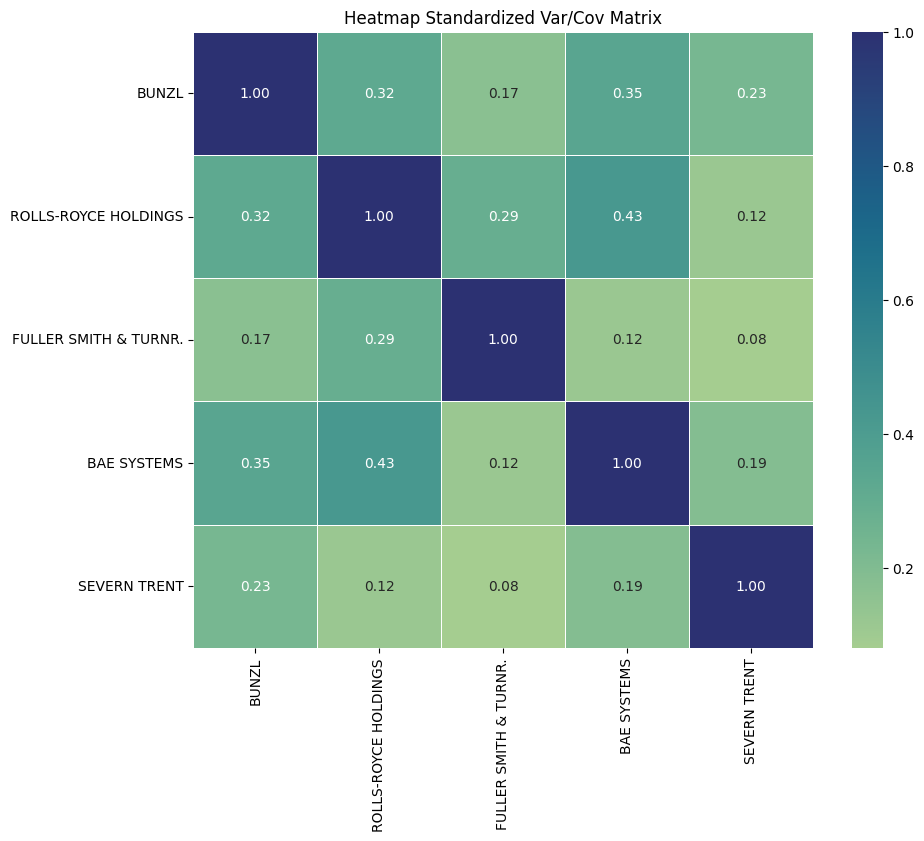

In [62]:
correlation_matrix = returndf18.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True,linewidth=.5, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Heatmap Standardized Var/Cov Matrix')
plt.show()

# 2. Optimizations

## 2.1 Optimal Portfolio 2018

In [63]:
mu = expected_returns.mean_historical_return(df18_stocks,frequency = 12,log_returns=True)
S = risk_models.sample_cov(df18_stocks,frequency = 12,log_returns=True)

In [64]:
ef1 = EfficientFrontier(mu, S)

In [65]:
weights = ef1.max_sharpe(rf18)
opt18 =weights
opt18

OrderedDict([('BUNZL', 0.5606636620775937),
             ('ROLLS-ROYCE HOLDINGS', 0.0),
             ('FULLER SMITH & TURNR.', 0.4393363379224064),
             ('BAE SYSTEMS', 0.0),
             ('SEVERN TRENT', 0.0)])

In [66]:
ef1.portfolio_performance(verbose=True,risk_free_rate= rf18)

Expected annual return: 8.8%
Annual volatility: 15.0%
Sharpe Ratio: 0.42


(0.08751469320006924, 0.15037996591946493, 0.420821719369072)

## 2.2 Minimum Variance 2018

In [67]:
ef_minVol = EfficientFrontier(mu,S)

In [68]:
min18 = ef_minVol.min_volatility()
min18

OrderedDict([('BUNZL', 0.2870091442167388),
             ('ROLLS-ROYCE HOLDINGS', 0.0),
             ('FULLER SMITH & TURNR.', 0.2681309895958624),
             ('BAE SYSTEMS', 0.0942183608912752),
             ('SEVERN TRENT', 0.3506415052961237)])

In [69]:
a = ef_minVol.portfolio_performance(verbose=True,risk_free_rate= rf18)

Expected annual return: 5.9%
Annual volatility: 12.5%
Sharpe Ratio: 0.28


## 2.3 Efficient Frontier 2018

In [70]:
efSR6= EfficientFrontier(mu,S)

Expected annual return: 8.8%
Annual volatility: 15.0%
Sharpe Ratio: 0.42
0.16306997405160714


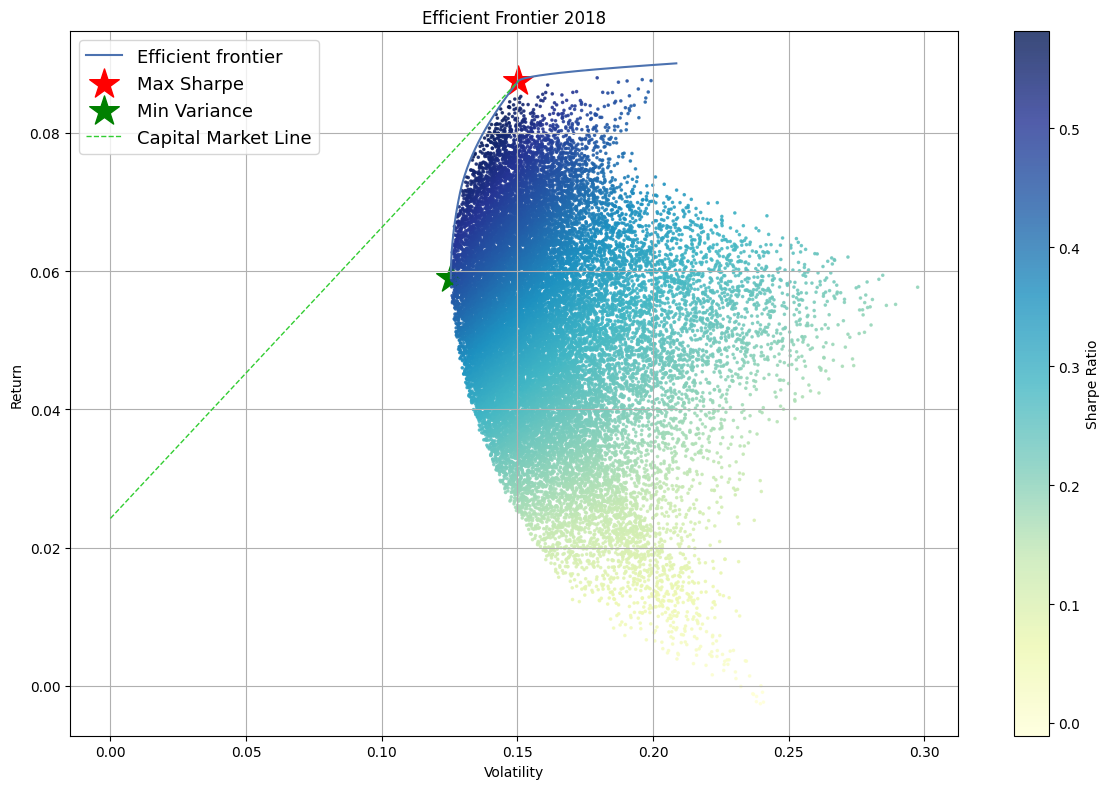

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
new_background_color = (1, 1, 1)  # Colore bianco (formato RGB)
fig.patch.set_facecolor(new_background_color)
ax.set_facecolor(new_background_color)

ef_max_sharpe = efSR6.deepcopy()

plotting.plot_efficient_frontier(efSR6, ax=ax, show_assets=False, show_tickers=False,points = 500)

ef_max_sharpe.max_sharpe(rf18)
ret_max_sharpe, std_max_sharpe, _ = ef_max_sharpe.portfolio_performance(rf18)
ax.scatter(std_max_sharpe, ret_max_sharpe, marker="*", s=500, c="r", label="Max Sharpe")
ax.scatter(a[1], a[0], marker="*", s=500, c="g", label="Min Variance")

slope_tangent = ((ret_max_sharpe - rf18) / std_max_sharpe)
intercept_tangent = rf18
x_tangent = np.linspace(0, std_max_sharpe, 100)
y_tangent = slope_tangent * x_tangent + intercept_tangent
ax.plot(x_tangent, y_tangent, linestyle="--", linewidth=1, c="limegreen", label="Capital Market Line")


n_samples = 25000
w = np.random.dirichlet(np.ones(efSR6.n_assets), n_samples)
rets = w.dot(efSR6.expected_returns)
stds = np.sqrt(np.diag(w @ efSR6.cov_matrix @ w.T))
sharpes = rets / stds
scatter = ax.scatter(stds, rets, marker=".", c=sharpes, cmap="YlGnBu",s=10, alpha=0.8)
print(stds.mean())
ax.set_title("Efficient Frontier 2018")
ax.legend(loc='upper left',prop={'size': 13})

cbar = fig.colorbar(scatter, ax=ax, label='Sharpe Ratio')
#cbar.ax.yaxis.set_label_coords(1, 1)

ax.grid(True)

plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=100)
plt.show()
#plt.savefig('foo.png')
#plt.savefig('foo.pdf')

## 2.4 Optimal Portfolio 2023

In [72]:
mu2 = expected_returns.mean_historical_return(df23_stocks,frequency = 12,log_returns=True)
S2 = risk_models.sample_cov(df23_stocks,frequency = 12,log_returns=True)

In [73]:
ef2 = EfficientFrontier(mu2, S2)

In [74]:
weights2 = ef2.max_sharpe(rf23)
opt23 =weights2
opt23

OrderedDict([('BUNZL', 0.0),
             ('ROLLS-ROYCE HOLDINGS', 0.0),
             ('FULLER SMITH & TURNR.', 0.0),
             ('BAE SYSTEMS', 0.5413317511453384),
             ('SEVERN TRENT', 0.4586682488546616)])

In [75]:
ef2.portfolio_performance(verbose=True,risk_free_rate= rf23)

Expected annual return: 4.7%
Annual volatility: 17.1%
Sharpe Ratio: 0.20


(0.046967426335146986, 0.17093785995855776, 0.19693313103751617)

## 2.5 Minimum Variance 2023

In [76]:
ef_minVol2 = EfficientFrontier(mu2,S2)

In [77]:
min23 = ef_minVol2.min_volatility()
min23

OrderedDict([('BUNZL', 0.2241295585234442),
             ('ROLLS-ROYCE HOLDINGS', 0.0200155749108739),
             ('FULLER SMITH & TURNR.', 0.0438926460310218),
             ('BAE SYSTEMS', 0.2373020066238078),
             ('SEVERN TRENT', 0.4746602139108522)])

In [78]:
b = ef_minVol2.portfolio_performance(verbose=True,risk_free_rate= rf23)

Expected annual return: 2.3%
Annual volatility: 14.7%
Sharpe Ratio: 0.07


## 2.6 Efficient Frontier 2023

In [79]:
efSR7= EfficientFrontier(mu2,S2)

Expected annual return: 4.7%
Annual volatility: 17.1%
Sharpe Ratio: 0.20
0.22090095311338787


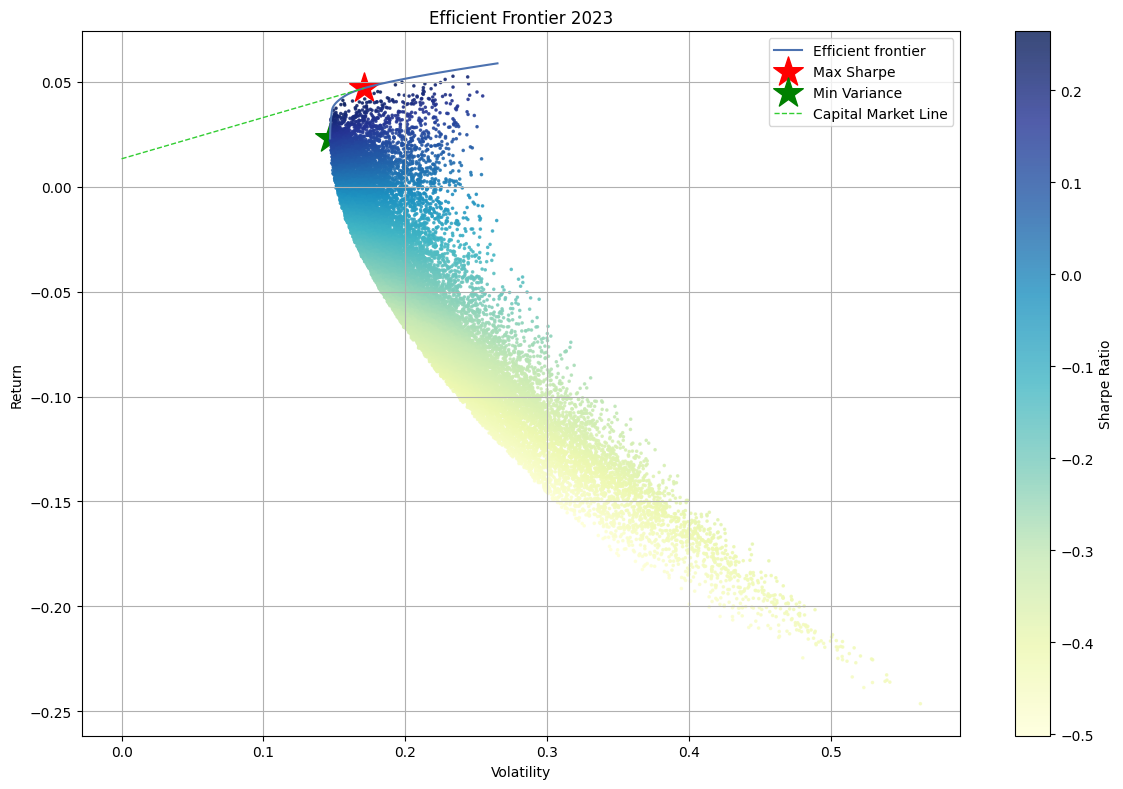

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))
new_background_color = (1, 1, 1)  # Colore bianco (formato RGB)
fig.patch.set_facecolor(new_background_color)
ax.set_facecolor(new_background_color)
ef_max_sharpe = efSR7.deepcopy()

# Plot dell'Efficient Frontier senza mostrare gli assets
plotting.plot_efficient_frontier(efSR7, ax=ax, show_assets=False, show_tickers=False, points=50)

# Calcolo del Max Sharpe
ef_max_sharpe.max_sharpe(rf23)
ret_max_sharpe, std_max_sharpe, _ = ef_max_sharpe.portfolio_performance(rf23)
ax.scatter(std_max_sharpe, ret_max_sharpe, marker="*", s=500, c="r", label="Max Sharpe")

# Plot della Min Variance
ax.scatter(b[1], b[0], marker="*", s=500, c="g", label="Min Variance")

# Plot della tangente
slope_tangent = ((ret_max_sharpe - rf23) / std_max_sharpe)
intercept_tangent = rf23
x_tangent = np.linspace(0, std_max_sharpe, 100)
y_tangent = slope_tangent * x_tangent + intercept_tangent
ax.plot(x_tangent, y_tangent, linestyle="--", linewidth=1,c= "limegreen", label="Capital Market Line")
n_samples = 25000
w = np.random.dirichlet(np.ones(efSR6.n_assets), n_samples)
rets = w.dot(efSR7.expected_returns)
stds = np.sqrt(np.diag(w @ efSR7.cov_matrix @ w.T))
sharpes = rets / stds
scatter = ax.scatter(stds, rets, marker=".", c=sharpes, cmap="YlGnBu",s=10, alpha=0.8)
print(stds.mean())
ax.set_title("Efficient Frontier 2023")
ax.legend()
# Aggiunta della colorbar per i Sharpe Ratio
cbar = fig.colorbar(scatter, ax=ax, label='Sharpe Ratio')
ax.grid(True)
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=100)
plt.show()

## 3. Portfolios

## 3.1 Rebalancing Portfolio

In [149]:
portfolio_value = 1000

In [150]:
min18

OrderedDict([('BUNZL', 0.2870091442167388),
             ('ROLLS-ROYCE HOLDINGS', 0.0),
             ('FULLER SMITH & TURNR.', 0.2681309895958624),
             ('BAE SYSTEMS', 0.0942183608912752),
             ('SEVERN TRENT', 0.3506415052961237)])

In [151]:
weights = [0.2 , 0.2, 0.2, 0.2, 0.2] 
stocks = ['BUNZL','ROLLS-ROYCE HOLDINGS','FULLER SMITH & TURNR.','BAE SYSTEMS','SEVERN TRENT']
stock_data = df23[['BUNZL','ROLLS-ROYCE HOLDINGS','FULLER SMITH & TURNR.','BAE SYSTEMS','SEVERN TRENT']]
stock_data = stock_data.reindex(columns=stocks)
#stock_data = stock_data.iloc[1:]
data = stock_data

In [152]:
new_indexes = pd.date_range(start='2018-01-01', periods=len(stock_data), freq='MS') #'2018-01-01'
stock_data.index = new_indexes

In [153]:
shares_df = pd.DataFrame(index=[stock_data.index[0]])
for s,w in zip(data, weights):
    shares_df[s + '_shares'] = ((portfolio_value * np.array(w).T) / stock_data[s][0])  

In [154]:
# Initialize variables
balance_year = stock_data.index[0].year
signal = False
count = 0    # for loop count purpose
prev_values = {}
portfolio_value = sum([shares_df.loc[stock_data.index[0], s + '_shares'] * stock_data.loc[stock_data.index[0], s] for s in stocks])

# Create a DataFrame to store asset values for each iteration
all_asset_values = pd.DataFrame(index=stock_data.index, columns=stocks)

for day in stock_data.index:
    count += 1
    if day == stock_data.index[0]:
        shares_df.loc[day] = shares_df.loc[day]  # First day
        for col in shares_df.columns:
            prev_values[col] = shares_df.loc[day, col]

    elif day.year != balance_year:
        signal = True
        new_shares = [((portfolio_value * w) / stock_data[s][day]) for s, w in zip(stocks, weights)]
        shares_df.loc[day, :] = new_shares
        balance_year = day.year
        count += 1
        for col in shares_df.columns:
            prev_values[col] = shares_df.loc[day, col]

    else:
        signal = False
        shares_df.loc[day, :] = [prev_values[col] for col in shares_df.columns]
    asset_values = [shares_df.loc[day, s + '_shares'] * stock_data.loc[day, s] for s in stocks]
    all_asset_values.loc[day, :] = asset_values

    portfolio_value = sum(asset_values)

    stock_data.loc[day, 'Signal'] = signal
    stock_data.loc[day, 'Portfolio_Value'] = portfolio_value
    for s in stocks:
        stock_data.loc[day, s + '_shares'] = shares_df.loc[day, s + '_shares']
        stock_data.loc[day, s + '_value'] = shares_df.loc[day, s + '_shares'] * stock_data.loc[day, s]


In [155]:
stock_data['Portfolio_Value_rets'] = np.log(stock_data['Portfolio_Value'] / stock_data['Portfolio_Value'].shift(1))
for stock in stocks:
    stock_data[f'{stock}_rets'] = np.log(stock_data[stock] / stock_data[stock].shift(1))

In [156]:
start_date_benchmark = stock_data.index[0]
stock_data = stock_data.dropna()
for s in stocks:
    stock_data[s + '_weight'] = stock_data[s + '_value'] / stock_data['Portfolio_Value']
weighted_stuff = stock_data.filter(regex='weight')

In [157]:
portfolio_value

1694.6588229370493

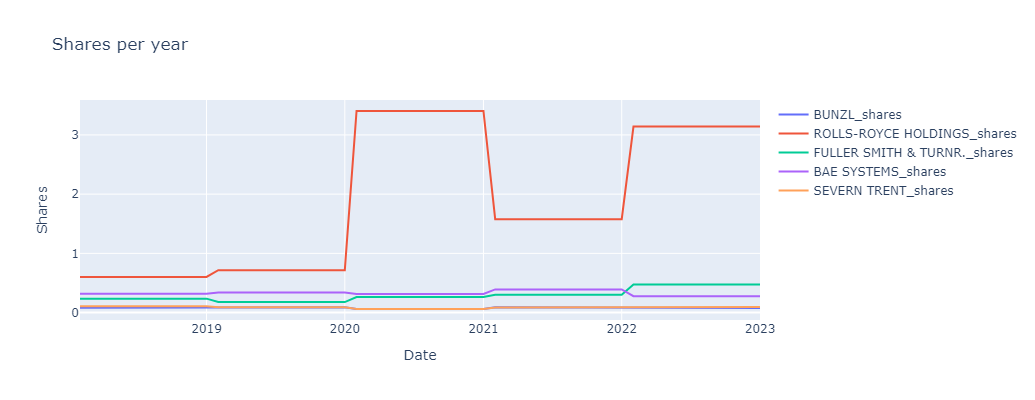

In [158]:
fig = go.Figure()
for stock in stocks:
    fig.add_trace(go.Scatter(x=stock_data.index, y=shares_df[stock+'_shares'], mode='lines', name=stock+'_shares'))
fig.update_layout(title='Shares per year',
                  xaxis_title='Date',
                  yaxis_title='Shares',
                  width=800,
                  height=400)
fig.show()

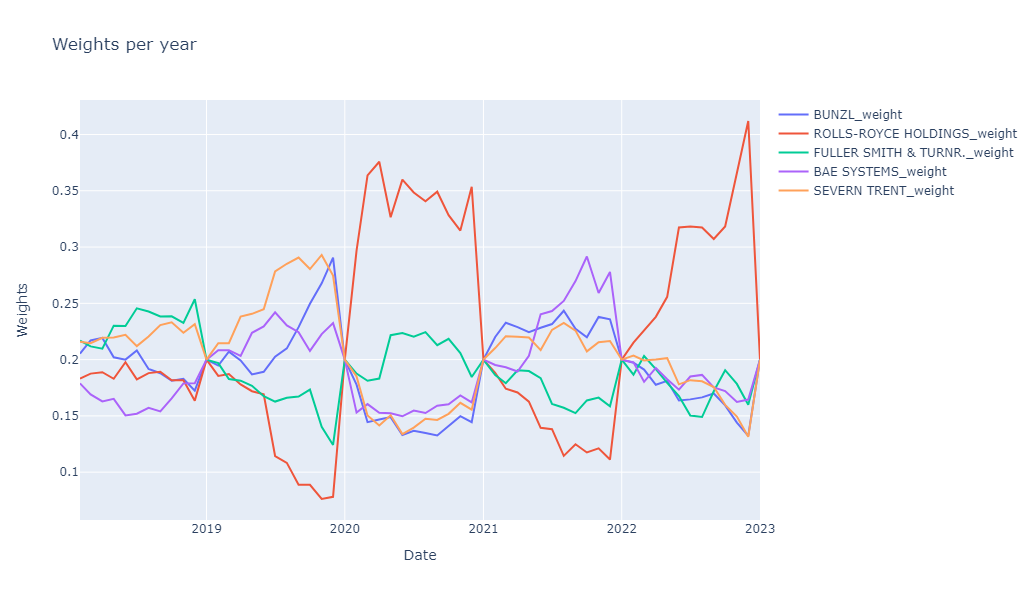

In [159]:
fig = go.Figure()
for stock in stocks:
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data[stock + '_weight'], mode='lines', name=stock + '_weight'))
fig.update_layout(title='Weights per year',
                  xaxis_title='Date',
                  yaxis_title='Weights',
                  width=1000,
                  height=600)
fig.show()

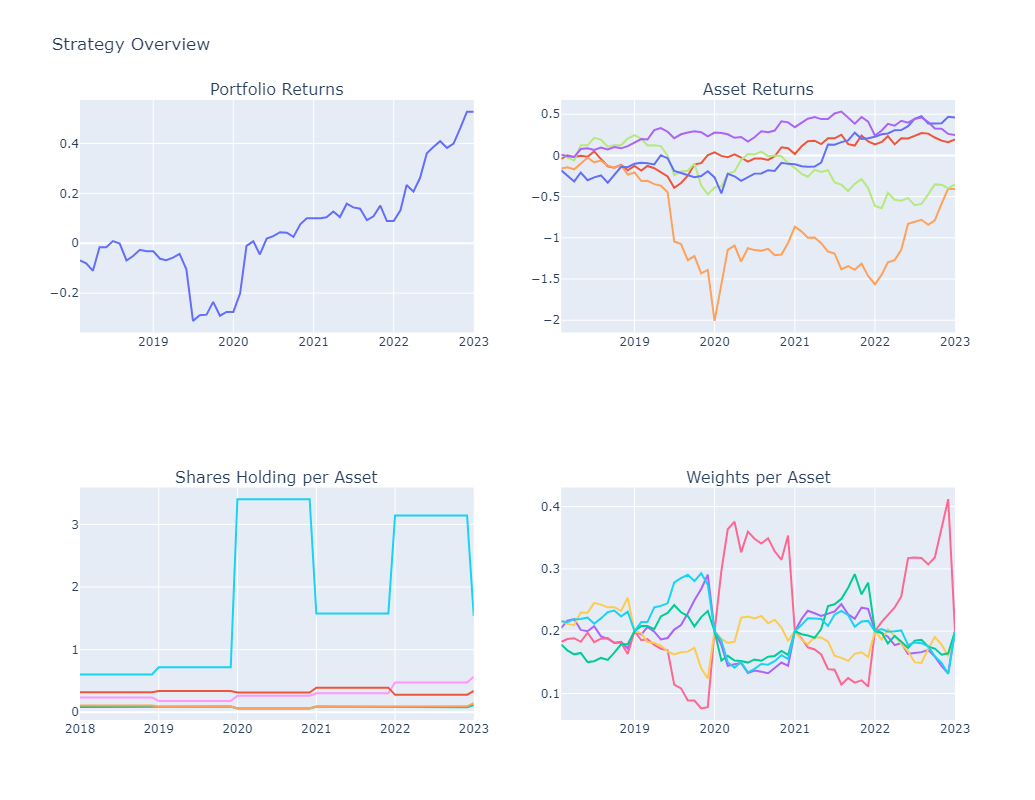

In [160]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Portfolio Returns', 'Asset Returns', 'Shares Holding per Asset', 'Weights per Asset'))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Portfolio_Value_rets'].cumsum(), name='Portfolio'), row=1, col=1)
for s in stocks:
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data[f'{s}_rets'].cumsum(), name=f'{s}'), row=1, col=2)
    fig.add_trace(go.Scatter(x=shares_df.index, y=shares_df[f'{s}_shares'], name=f'{s}'), row=2, col=1)
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data[f'{s}_weight'], name=f'{s}'), row=2, col=2)
fig.update_layout(height=800, width=1200, title='Strategy Overview', showlegend=False)
fig.show()

## 3.2 No rebalancing Portfolio

In [161]:
equal = np.array(df23[['BUNZL','ROLLS-ROYCE HOLDINGS','FULLER SMITH & TURNR.','BAE SYSTEMS','SEVERN TRENT']].tail(1))
b = np.array((0.082884,0.601902,0.235311,0.317561,0.108167))
final_wealth = equal*b
np.sum(final_wealth)

1088.8720346

# 4.Data Analysis

## 4.1 Synthetic Volatility Index

In [162]:
returns2018 = np.log(df18_stocks/df18_stocks.shift(1))
returns2023 = np.log(df23_stocks/df23_stocks.shift(1))

In [163]:
index1 = np.sum(df23_stocks,axis = 1)
index2 = (df23_stocks.T/index1.T).T
index3 = pd.DataFrame(np.sum(df23_stocks * index2,axis=1))
index4 = np.log(index3/index3.shift(1)).dropna()
index_std = np.std(index4)
index_std

0    0.050226
dtype: float64

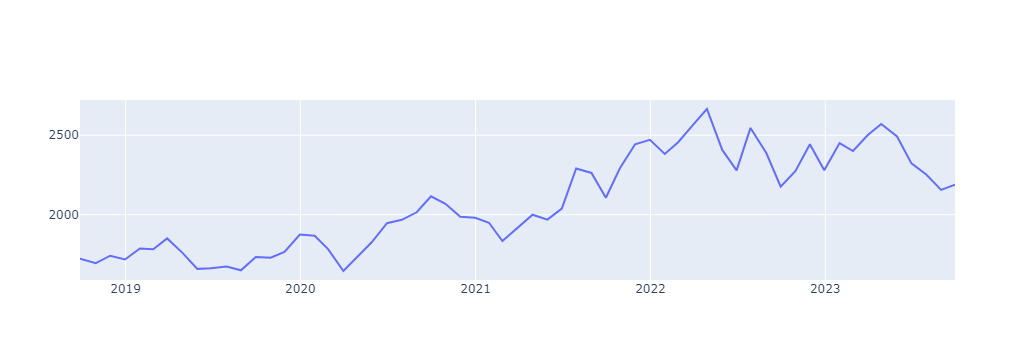

In [164]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=index3.index, y=index3[0], mode='lines', name='Line'))
fig.show()

## 4.2 Annualised Var/Cov Matrix, Log-Returns Mean Analysis

### 4.2.1 First period up to 2018

In [165]:
returns2018.cov()*12

,BUNZL,ROLLS-ROYCE HOLDINGS,FULLER SMITH & TURNR.,BAE SYSTEMS,SEVERN TRENT
BUNZL,0.033829,0.018960,0.006618,0.016267,0.007781
ROLLS-ROYCE HOLDINGS,0.018960,0.100677,0.019320,0.034641,0.007021
FULLER SMITH & TURNR.,0.006618,0.019320,0.045178,0.006520,0.003187
BAE SYSTEMS,0.016267,0.034641,0.006520,0.065650,0.008961
SEVERN TRENT,0.007781,0.007021,0.003187,0.008961,0.033689


In [166]:
mu  #annualized mean for opt18's stocks

BUNZL                    0.085443
ROLLS-ROYCE HOLDINGS     0.057635
FULLER SMITH & TURNR.    0.090158
BAE SYSTEMS             -0.008523
SEVERN TRENT             0.031636
dtype: float64

In [167]:
asset18_Sharpe = {
    'BUNZL': round((0.085443 - rf18) / np.sqrt(0.033829), 3),
    'ROLLSROYCEHOLDINGS': round((0.057635 - rf18) / np.sqrt(0.100677), 3),
    'SMITHTURNR': round((0.090158 - rf18) / np.sqrt(0.045178), 3),
    'BAESYSTEMS': round((-0.008523 - rf18) / np.sqrt(0.065650), 3),
    'SEVERNTRENT': round((0.031636 - rf18) / np.sqrt(0.033689), 3)
}
asset18_Sharpe

{'BUNZL': 0.333,
 'ROLLSROYCEHOLDINGS': 0.105,
 'SMITHTURNR': 0.31,
 'BAESYSTEMS': -0.128,
 'SEVERNTRENT': 0.04}

### 4.2.2 Second Period up to 2023

In [168]:
returns2023.cov()*12

,BUNZL,ROLLS-ROYCE HOLDINGS,FULLER SMITH & TURNR.,BAE SYSTEMS,SEVERN TRENT
BUNZL,0.044334,0.008099,0.017524,0.009205,0.017981
ROLLS-ROYCE HOLDINGS,0.008099,0.355178,0.051473,0.041048,0.001396
FULLER SMITH & TURNR.,0.017524,0.051473,0.101470,0.013604,0.018849
BAE SYSTEMS,0.009205,0.041048,0.013604,0.070745,0.002775
SEVERN TRENT,0.017981,0.001396,0.018849,0.002775,0.033799


In [169]:
mu2       #annualized mean for opt18's stocks

BUNZL                    0.016885
ROLLS-ROYCE HOLDINGS    -0.263280
FULLER SMITH & TURNR.   -0.115814
BAE SYSTEMS              0.058891
SEVERN TRENT             0.032895
dtype: float64

In [170]:
asset23_Sharpe = {
    'BUNZL': round((0.016885 - rf18) / np.sqrt(0.044334), 3),
    'ROLLSROYCEHOLDINGS': round((-0.263280 - rf18) / np.sqrt(0.355178), 3),
    'SMITHTURNR': round((-0.115814 - rf18) / np.sqrt(0.101470), 3),
    'BAESYSTEMS': round((0.058891 - rf18) / np.sqrt(0.070745), 3),
    'SEVERNTRENT': round((0.032895 - rf18) / np.sqrt(0.033799), 3)
}
asset23_Sharpe

{'BUNZL': -0.035,
 'ROLLSROYCEHOLDINGS': -0.482,
 'SMITHTURNR': -0.44,
 'BAESYSTEMS': 0.13,
 'SEVERNTRENT': 0.047}

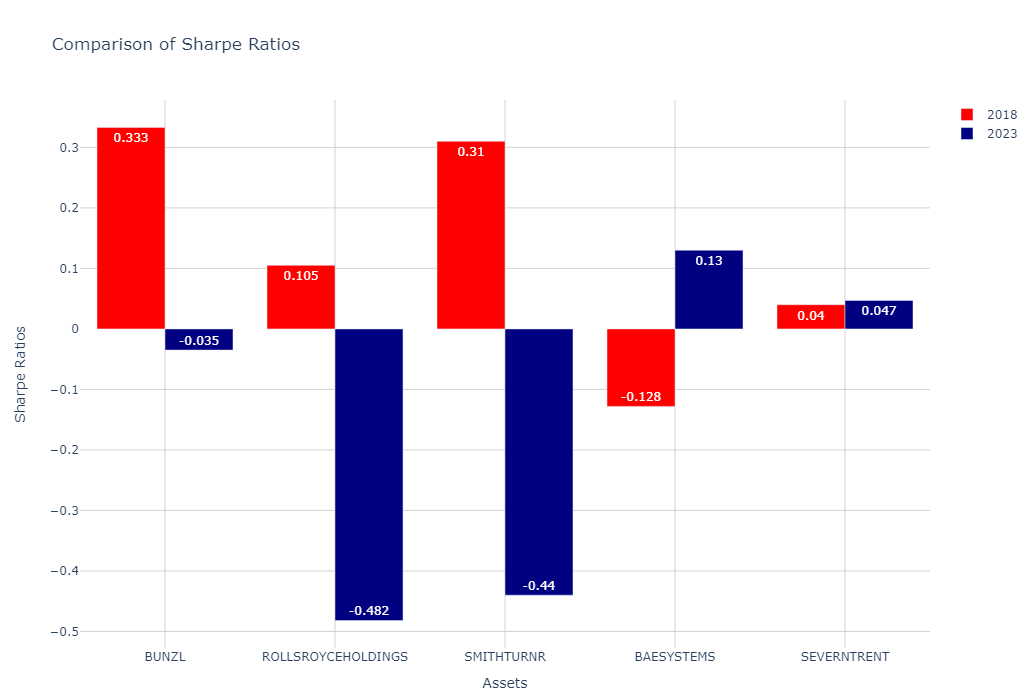

In [171]:
trace18 = go.Bar(
    x=list(asset18_Sharpe.keys()),
    y=list(asset18_Sharpe.values()),
    name='2018',
    marker=dict(color='red'),
    text=list(asset18_Sharpe.values()),  # Aggiungi questa riga
    textposition='auto'  # Aggiungi questa riga per posizionare automaticamente il testo
)

trace23 = go.Bar(
    x=list(asset23_Sharpe.keys()),
    y=list(asset23_Sharpe.values()),
    name='2023',
    marker=dict(color='navy'),
    text=list(asset23_Sharpe.values()),  # Aggiungi questa riga
    textposition='auto'  # Aggiungi questa riga
)

layout = go.Layout(
    xaxis=dict(tickangle=0, showgrid=True, gridwidth=1, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'),
    barmode='group',  
    height=700,  
    margin=dict(b=50),
    plot_bgcolor='white'  
)

fig = go.Figure(data=[trace18, trace23], layout=layout)
fig.update_layout(xaxis_title='Assets', yaxis_title='Sharpe Ratios', title='Comparison of Sharpe Ratios')
fig.show()